AttributeError: 'FigureManagerBase' object has no attribute 'window'

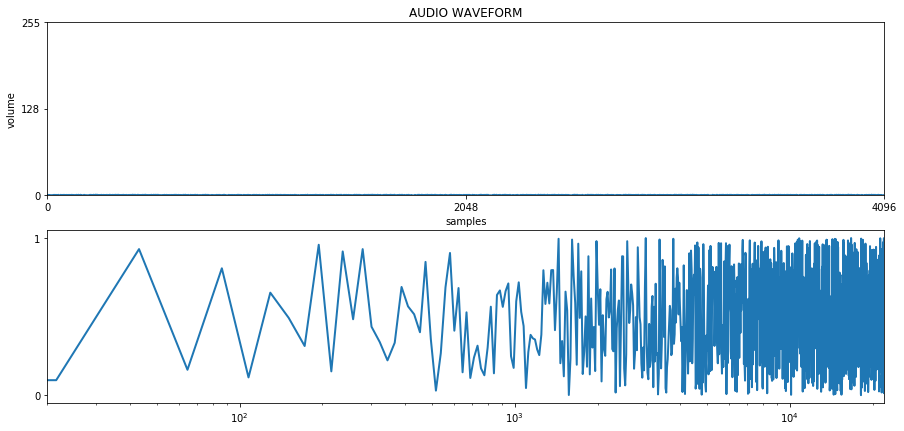

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
from pyqtgraph.Qt import QtGui, QtCore
import pyqtgraph as pg
import struct
from scipy.fftpack import fft
import sys
import time


class AudioStream(object):
    def __init__(self):

        # stream constants
        self.CHUNK = 1024 * 2
        self.FORMAT = pyaudio.paInt16
        self.CHANNELS = 1
        self.RATE = 44100
        self.pause = False

        # stream object
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(
            format=self.FORMAT,
            channels=self.CHANNELS,
            rate=self.RATE,
            input=True,
            output=True,
            frames_per_buffer=self.CHUNK,
        )
        self.init_plots()
        self.start_plot()

    def init_plots(self):

        # x variables for plotting
        x = np.arange(0, 2 * self.CHUNK, 2)
        xf = np.linspace(0, self.RATE, self.CHUNK)

        # create matplotlib figure and axes
        self.fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))
        self.fig.canvas.mpl_connect('button_press_event', self.onClick)

        # create a line object with random data
        self.line, = ax1.plot(x, np.random.rand(self.CHUNK), '-', lw=2)

        # create semilogx line for spectrum
        self.line_fft, = ax2.semilogx(
            xf, np.random.rand(self.CHUNK), '-', lw=2)

        # format waveform axes
        ax1.set_title('AUDIO WAVEFORM')
        ax1.set_xlabel('samples')
        ax1.set_ylabel('volume')
        ax1.set_ylim(0, 255)
        ax1.set_xlim(0, 2 * self.CHUNK)
        plt.setp(
            ax1, yticks=[0, 128, 255],
            xticks=[0, self.CHUNK, 2 * self.CHUNK],
        )
        plt.setp(ax2, yticks=[0, 1],)

        # format spectrum axes
        ax2.set_xlim(20, self.RATE / 2)

        # show axes
        thismanager = plt.get_current_fig_manager()
        thismanager.window.setGeometry(5, 120, 1910, 1070)
        plt.show(block=False)

    def start_plot(self):

        print('stream started')
        frame_count = 0
        start_time = time.time()

        while not self.pause:
            data = self.stream.read(self.CHUNK)
            data_int = struct.unpack(str(2 * self.CHUNK) + 'B', data)
            data_np = np.array(data_int, dtype='b')[::2] + 128

            self.line.set_ydata(data_np)

            # compute FFT and update line
            yf = fft(data_int)
            self.line_fft.set_ydata(
                np.abs(yf[0:self.CHUNK]) / (128 * self.CHUNK))

            # update figure canvas
            self.fig.canvas.draw()
            self.fig.canvas.flush_events()
            frame_count += 1

        else:
            self.fr = frame_count / (time.time() - start_time)
            print('average frame rate = {:.0f} FPS'.format(self.fr))
            self.exit_app()

    def exit_app(self):
        print('stream closed')
        self.p.close(self.stream)

    def onClick(self, event):
        self.pause = True


if __name__ == '__main__':
    AudioStream()

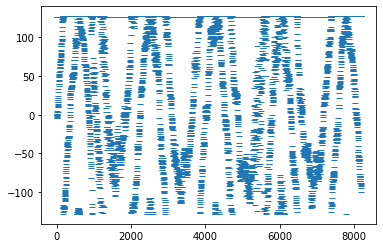

In [11]:
p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,channels = CHANNELS, rate = RATE, input = True, output = True,frames_per_buffer = CHUNK)

data = stream.read(CHUNK)
data_int = np.array(struct.unpack(str(2*CHUNK) + 'B', data), dtype = 'b') + 127 
data_int
fig, ax = plt.subplots()
ax.plot(data_int,'_')
plt.show()